# Pipeline Project

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Load Data

## Import libraries and Requirement things :

#### Configure a NLP

In [1]:
!pip install spacy


[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 46.7 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
pip install -U nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.7 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 9.8 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import spacy

In [6]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 14.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.8/296.8 MB 5.7 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
nlp = spacy.load("en_core_web_sm")

#### Import Libraries :

In [8]:
#!/usr/bin/env python
# coding: utf-8

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction import DictVectorizer
import joblib
import warnings
warnings.filterwarnings('ignore')
import nltk
from sklearn.preprocessing import FunctionTransformer

# Download the missing resource
nltk.download('punkt_tab')
# Download nltk punkt
nltk.download('punkt')

# Load SpaCy model
try:
    nlp = spacy.load('en_core_web_sm')
except OSError:
    import subprocess, sys
    subprocess.run([sys.executable, "-m", "spacy", "download", "en_core_web_sm"])
    nlp = spacy.load('en_core_web_sm')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/student/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /home/student/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [9]:
# Load data
df = pd.read_csv('data/reviews.csv')
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


## Preparing features (`X`) & target (`y`)

In [10]:
data = df

# separate features from labels
X = df.drop('Recommended IND', axis=1)
y = df['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


# Text Preprocessing 

In [11]:
# Custom Transformer: combine text + POS + NER + TF-IDF
class TextFeatureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, text_columns=['Title', 'Review Text']):
        self.text_columns = text_columns
        self.nlp = spacy.load("en_core_web_sm", disable=['parser'])
        self.tfidf_vectorizer = TfidfVectorizer(max_features=3000, min_df=2, max_df=0.85, ngram_range=(1,2))
        self.pos_vectorizer = DictVectorizer(sparse=False)
        self.entity_vectorizer = DictVectorizer(sparse=False)
        
    def preprocess_text(self, text):
        text = str(text).lower()
        text = re.sub(r'[^a-z\s]', '', text)
        return text
    
    def extract_pos_ner_counts(self, text):
        doc = self.nlp(text)
        pos_counts = {}
        for token in doc:
            pos_counts[token.pos_] = pos_counts.get(token.pos_, 0) + 1
        entity_counts = {}
        for ent in doc.ents:
            entity_counts[ent.label_] = entity_counts.get(ent.label_, 0) + 1
        return pos_counts, entity_counts

    def fit(self, X, y=None):
        combined_text = (X[self.text_columns[0]].fillna('') + ' ' + X[self.text_columns[1]].fillna('')).apply(self.preprocess_text)
        self.tfidf_vectorizer.fit(combined_text)
        
        # Fit POS & NER vectorizers
        pos_list, entity_list = [], []
        for text in combined_text:
            pos_counts, entity_counts = self.extract_pos_ner_counts(text)
            pos_list.append(pos_counts)
            entity_list.append(entity_counts)
        self.pos_vectorizer.fit(pos_list)
        self.entity_vectorizer.fit(entity_list)
        return self

    def transform(self, X):
        combined_text = (X[self.text_columns[0]].fillna('') + ' ' + X[self.text_columns[1]].fillna('')).apply(self.preprocess_text)
        tfidf_matrix = self.tfidf_vectorizer.transform(combined_text)
        
        pos_list, entity_list = [], []
        for text in combined_text:
            pos_counts, entity_counts = self.extract_pos_ner_counts(text)
            pos_list.append(pos_counts)
            entity_list.append(entity_counts)
        pos_matrix = self.pos_vectorizer.transform(pos_list)
        entity_matrix = self.entity_vectorizer.transform(entity_list)
        
        from scipy.sparse import hstack
        return hstack([tfidf_matrix, pos_matrix, entity_matrix])


In [12]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27
)


#X_train = combine_full_review(X_train)
#X_test = combine_full_review(X_test)

## Data exploration

### Target Variable Analysis

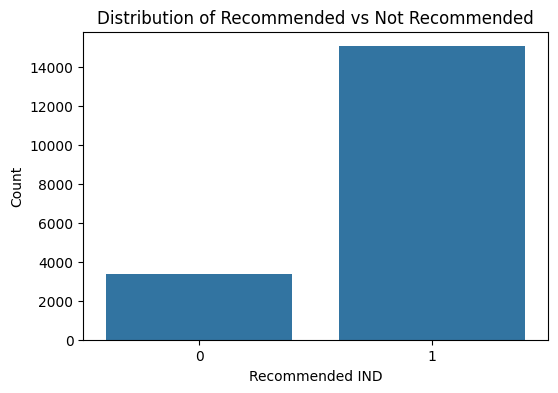

Class distribution:
Recommended IND
1    15053
0     3389
Name: count, dtype: int64

Class percentage:
Recommended IND
1    81.623468
0    18.376532
Name: proportion, dtype: float64


In [13]:
# Distribution of recommendations
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Distribution of Recommended vs Not Recommended')
plt.xlabel('Recommended IND')
plt.ylabel('Count')
plt.show()

# Class balance
print("Class distribution:")
print(y.value_counts())
print("\nClass percentage:")
print(y.value_counts(normalize=True)*100)


### Numerical Feature Analysis

,Age,Positive Feedback Count
count,18442.000000,18442.000000
mean,43.383635,2.697484
std,12.246264,5.942220
min,18.000000,0.000000
25%,34.000000,0.000000
50%,41.000000,1.000000
75%,52.000000,3.000000
max,99.000000,122.000000


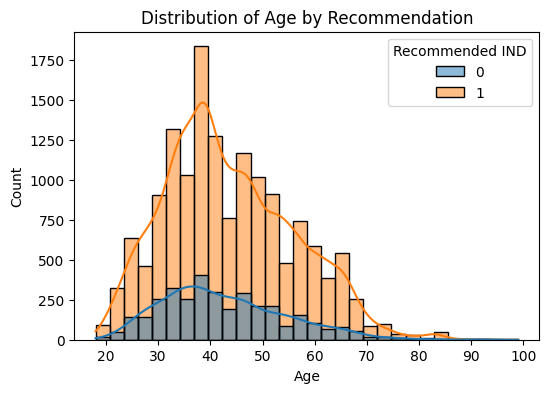

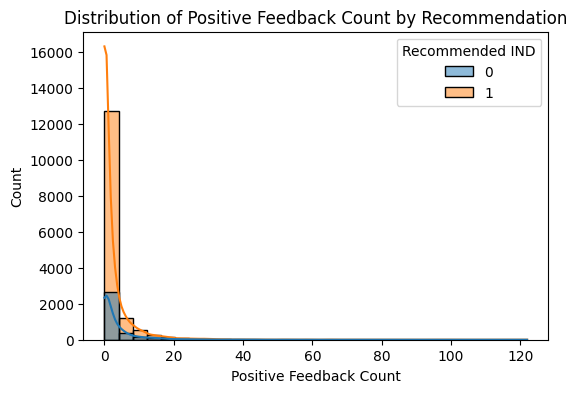

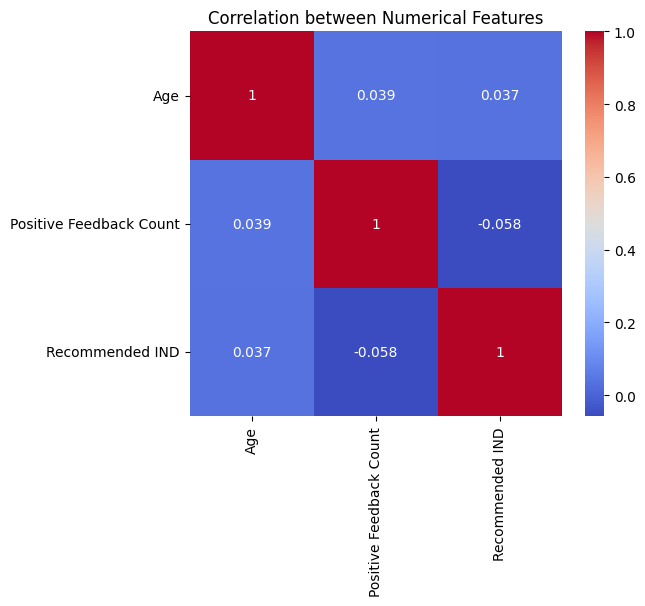

In [14]:
numerical_features = ['Age', 'Positive Feedback Count']
df_plot = X[numerical_features].copy()
df_plot['Recommended IND'] = y
# Summary statistics
display(X[numerical_features].describe())

# Histograms
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_plot, x=feature, hue='Recommended IND', bins=30, alpha=0.5, kde=True)
    plt.title(f'Distribution of {feature} by Recommendation')
    plt.show()

# Correlation heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(df_plot.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Numerical Features')
plt.show()


### Categorical Feature Analysis

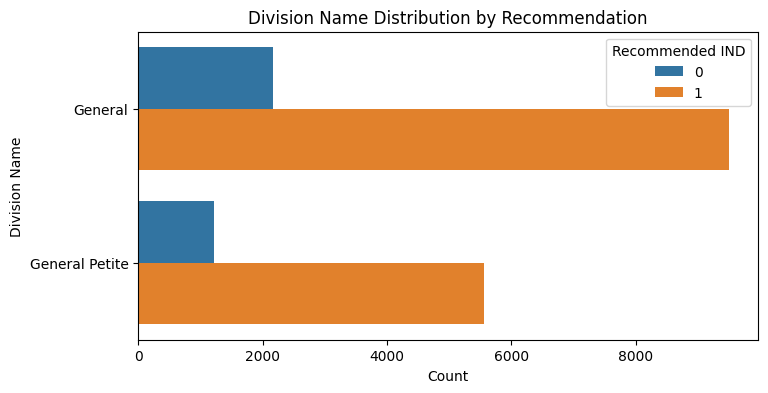

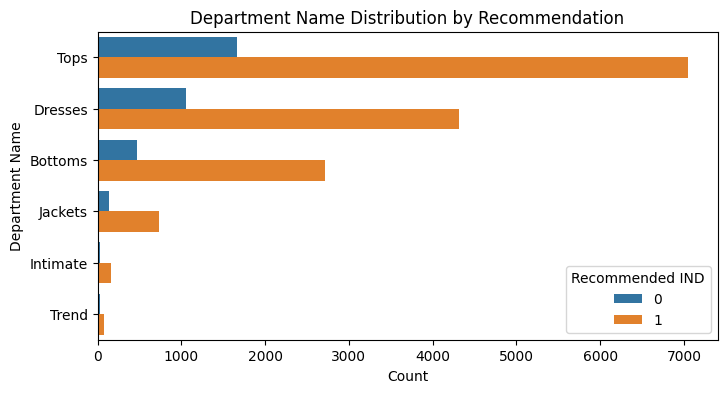

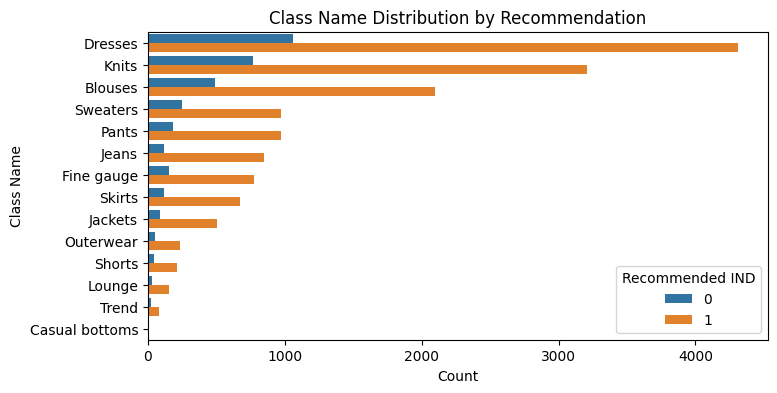

In [15]:
categorical_features = ['Division Name', 'Department Name', 'Class Name']

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=X, y=feature, hue=y, order=X[feature].value_counts().index)
    plt.title(f'{feature} Distribution by Recommendation')
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.show()


### Text Feature Exploration

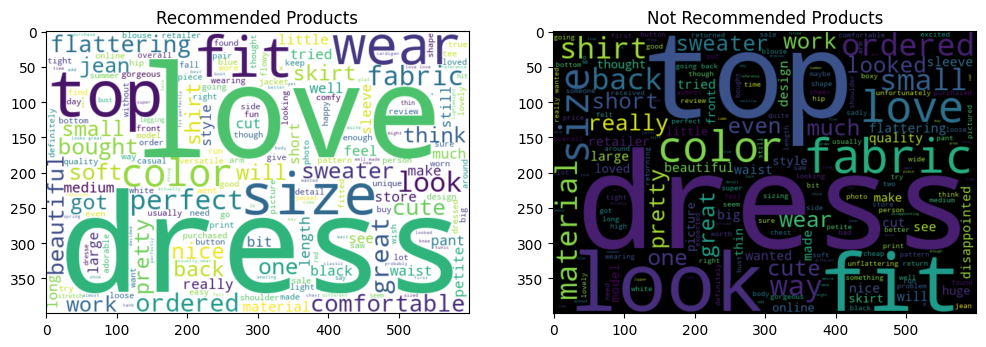

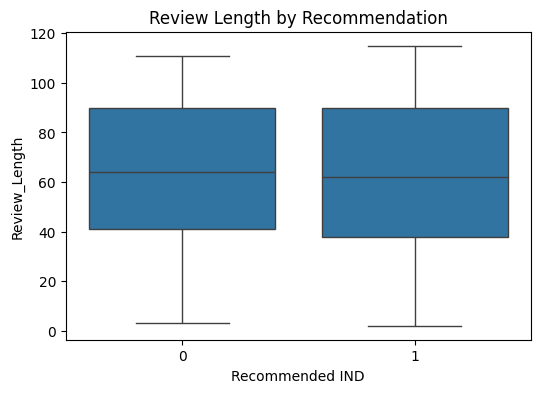

In [16]:
# Create a combined review column
X_temp = X.copy()
X_temp['Full_Review'] = X_temp['Title'].fillna('') + ' ' + X_temp['Review Text'].fillna('')

# Word cloud for recommended vs not recommended
from wordcloud import WordCloud

recommended_text = ' '.join(X_temp[y == 1]['Full_Review'])
not_recommended_text = ' '.join(X_temp[y == 0]['Full_Review'])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=600, height=400, background_color='white').generate(recommended_text), interpolation='bilinear')
plt.title('Recommended Products')

plt.subplot(1, 2, 2)
WordCloud(width=600, height=400, background_color='white').generate(not_recommended_text)
plt.imshow(WordCloud(width=600, height=400).generate(not_recommended_text), interpolation='bilinear')
plt.title('Not Recommended Products')

plt.show()

#  Review length distribution (pipeline-friendly: using raw 'Review Text')
X_temp['Review_Length'] = X_temp['Review Text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(6, 4))
sns.boxplot(x=y, y=X_temp['Review_Length'])
plt.title('Review Length by Recommendation')
plt.show()



### Feature Relationships

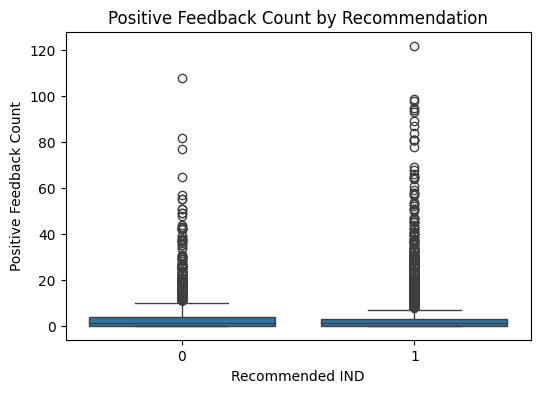

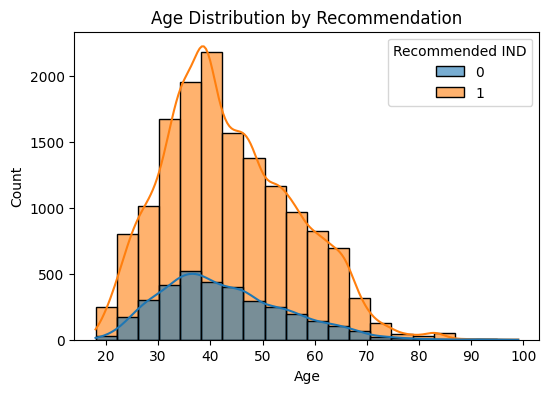

In [17]:
# Positive feedback vs recommendation
plt.figure(figsize=(6, 4))
sns.boxplot(x=y, y=X['Positive Feedback Count'])
plt.title('Positive Feedback Count by Recommendation')
plt.show()

# Age distribution vs recommendation
plt.figure(figsize=(6, 4))
sns.histplot(data=X, x='Age', hue=y, bins=20, kde=True, alpha=0.6)
plt.title('Age Distribution by Recommendation')
plt.show()


### Preprocessing Pipelines

In [18]:
# Numeric + categorical preprocessing
numeric_features = ['Age', 'Positive Feedback Count']
categorical_features = ['Clothing ID', 'Division Name', 'Department Name', 'Class Name']

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features),
    ('text', TextFeatureTransformer(), ['Title', 'Review Text'])  # Only raw text columns here
], remainder='drop')



### Define Pipelines for Random Forest & XGBoost

In [19]:
# Random Forest pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        random_state=27,
        class_weight='balanced',
        n_jobs=-1
    ))
])

# XGBoost pipeline
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        random_state=27,
        n_jobs=-1
    ))
])

### Train & Evaluate Models

In [ ]:
# Fit pipelines on raw training data (preprocessing included)
rf_pipeline.fit(X_train, y_train)
xgb_pipeline.fit(X_train, y_train)

# Make predictions on raw test data
rf_preds = rf_pipeline.predict(X_test)
xgb_preds = xgb_pipeline.predict(X_test)

# Classification reports
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))

print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_preds))

## Hyperparameter Tuning

In [ ]:
# --- Random Forest ---
rf_param_dist = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
}

rf_random_search = RandomizedSearchCV(
    rf_pipeline,
    param_distributions=rf_param_dist,
    n_iter=10,       # test 10 random combinations
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=27
)

rf_random_search.fit(X_train, y_train)
best_rf_model = rf_random_search.best_estimator_
print("Best RF params:", rf_random_search.best_params_)


# --- XGBoost ---
xgb_param_dist = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 6, 9],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__subsample': [0.8, 0.9, 1.0],
}

xgb_random_search = RandomizedSearchCV(
    xgb_pipeline,
    param_distributions=xgb_param_dist,
    n_iter=10,       # test 10 random combinations
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=27
)

xgb_random_search.fit(X_train, y_train)
best_xgb_model = xgb_random_search.best_estimator_
print("Best XGB params:", xgb_random_search.best_params_)

# Feature Importance Analysis (numeric, categorical, text contributions)

In [ ]:
# Feature Importance Analysis (numeric, categorical, text contributions)
def analyze_feature_importance(model, numeric_features, categorical_features):
    """
    Approximate contribution of numeric, categorical, and text features.
    Text contributions include TF-IDF + POS + NER from TextFeatureTransformer.
    """
    importances = model.named_steps['classifier'].feature_importances_
    preprocessor = model.named_steps['preprocessor']
    
    # Numeric features
    num_idx = np.arange(len(numeric_features))
    
    # Categorical features (after one-hot)
    cat_transformer = preprocessor.named_transformers_['cat'].named_steps['onehot']
    cat_features = cat_transformer.get_feature_names_out(categorical_features)
    cat_idx = np.arange(len(numeric_features), len(numeric_features) + len(cat_features))
    
    # Remaining features are text contributions
    text_idx = np.arange(len(numeric_features) + len(cat_features), len(importances))
    
    importance_by_type = {
        'Numeric': np.sum(importances[num_idx]),
        'Categorical': np.sum(importances[cat_idx]),
        'Text': np.sum(importances[text_idx])
    }
    
    total = sum(importance_by_type.values())
    for k in importance_by_type:
        importance_by_type[k] = (importance_by_type[k]/total) * 100
    
    return importance_by_type

# Compute feature importance percentages
rf_importance = analyze_feature_importance(best_rf_model, numeric_features, categorical_features)
xgb_importance = analyze_feature_importance(best_xgb_model, numeric_features, categorical_features)

print("Random Forest Feature Importance (%):", rf_importance)
print("XGBoost Feature Importance (%):", xgb_importance)



## Save Best Model

In [ ]:
# Save Best Model Pipelines
import joblib
joblib.dump(best_rf_model, 'best_rf_pipeline.pkl')
joblib.dump(best_xgb_model, 'best_xgb_pipeline.pkl')
print("Pipelines saved successfully.")
